# classification es el notebook oficial de clasificación

### - Limpiamos los datos según conclusiones del notebook main
### - Probaremos distintos algorítmos de clasificación y compararemos los resultados
### - Utilizamos el dataset de train ya recortado por la cátedra

---





## ACA TODOS LOS IMPORTS DEL NOTEBOOK

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, validation_curve
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve,recall_score


## LECTURA Y LIMPIEZA DEL DATASET

In [90]:
df_orig = pd.read_csv(r"DS_G3_HeartFailure_FULL_train.csv",index_col=0)  #datos de entrenamiento (80% del dataset original)
df_orig.shape

(239, 13)

In [91]:
df_cleaned = df_orig.copy()
feat_train, targ_train = df_orig.drop(["DEATH_EVENT"],axis=1),df_orig["DEATH_EVENT"]
print(feat_train.shape)
print(targ_train.shape)

(239, 12)
(239,)


In [92]:
rfe = RFECV(RandomForestClassifier(n_estimators=2000),scoring="recall",min_features_to_select=6,cv=10,verbose=1,n_jobs=-1)
rfe = rfe.fit(feat_train,targ_train)

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


In [93]:
for feat in zip(feat_train.columns,rfe.support_):
    print(feat)

('age', True)
('anaemia', False)
('creatinine_phosphokinase', True)
('diabetes', False)
('ejection_fraction', True)
('high_blood_pressure', False)
('platelets', True)
('serum_creatinine', True)
('serum_sodium', True)
('sex', False)
('smoking', False)
('time', True)


## Transformaciones necesarias al df

In [97]:
df_cleaned = df_orig.drop(["time","anaemia","diabetes","high_blood_pressure","sex","smoking"],axis=1)

#df_cleaned = df_orig.drop(["anaemia","diabetes","high_blood_pressure","sex","smoking"],axis=1)
# NOS QUEDAMOS CON AGE, CREATININE_PHOSPHOKINASE, EJECTION_FRACTION, PLATELETS, SERUM_CREATININE, SERUM_SODIUM Y DEATH_EVENT
df_cleaned.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
55,95.0,371,30,461000.0,2.0,132,1
180,40.0,478,30,303000.0,0.9,136,0
237,70.0,232,30,173000.0,1.2,132,0
280,70.0,2695,40,241000.0,1.0,137,0
181,59.0,176,25,221000.0,1.0,136,1


In [38]:
print(df_cleaned.shape)  #6 features + target

(239, 7)


In [9]:
#feat_train, feat_test, targ_train, targ_test = train_test_split(df_cleaned.drop(["DEATH_EVENT"],axis=1),df_cleaned["DEATH_EVENT"],test_size=0.1,random_state=420)
#HAY QUE SEPARAR EL TEST ANTES DE ESTANDARIZAR PARA QUE NO INFLUYAN LOS FEATURES DE TEST EN LA MEDIA Y VARIANZA

In [98]:
feat_train, targ_train = df_cleaned.drop(["DEATH_EVENT"],axis=1),df_cleaned["DEATH_EVENT"]
print(feat_train.shape)
print(targ_train.shape)

(239, 6)
(239,)


In [99]:
feat_train

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
55,95.0,371,30,461000.0,2.0,132
180,40.0,478,30,303000.0,0.9,136
237,70.0,232,30,173000.0,1.2,132
280,70.0,2695,40,241000.0,1.0,137
181,59.0,176,25,221000.0,1.0,136
...,...,...,...,...,...,...
277,70.0,582,38,25100.0,1.1,140
124,60.0,582,40,217000.0,3.7,134
47,60.0,582,38,451000.0,0.6,138
252,50.0,245,45,274000.0,1.0,133


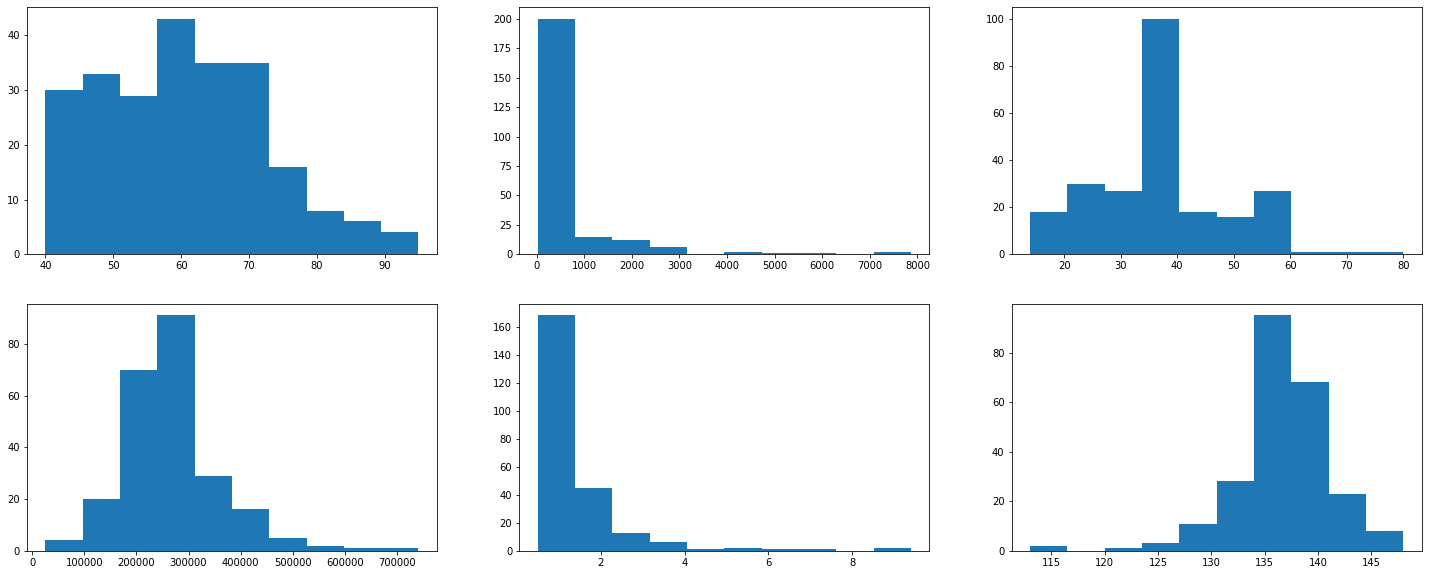

In [102]:
plt.figure(figsize=(25, 10))
for idx,feature in enumerate(feat_train.columns):
    plt.subplot(2,3,idx+1)
    plt.hist(feat_train[feature])

In [ ]:
for 

In [103]:
scaler = StandardScaler()
feat_train = scaler.fit_transform(feat_train)

print(np.sum(targ_train==0))
print(np.sum(targ_train==1))

#APLICAMOS SMOTE PARA AUMENTAR LA CANTIDAD DE SAMPLES Y BALANCEAR EL TARGET
feat_train, targ_train = SMOTE(random_state=420).fit_resample(feat_train, targ_train)
feat_train.shape

print(np.sum(targ_train==0))
print(np.sum(targ_train==1))

163
76
163
163


In [107]:
feat_train[:,0]

array([ 2.93432668, -1.75486496,  0.80287594,  0.80287594, -0.13496239,
        0.80287594,  0.973392  , -0.47599451,  0.80287594, -0.90228466,
        0.20606973, -0.04970436,  0.46184382, -0.90228466, -0.98754269,
       -0.90228466,  2.08174639, -0.81702663,  0.29132776, -0.22022042,
       -0.90228466, -1.32857481,  1.22916609, -0.90228466, -0.81702663,
       -0.7317686 , -1.75486496, -0.04970436,  0.00716274, -0.56125254,
       -0.04970436, -1.32857481, -1.07280072,  0.03555367, -0.22022042,
       -1.32857481, -0.90228466, -1.32857481,  0.80287594,  0.80287594,
       -0.47599451, -0.04970436, -0.04970436,  0.63235988,  0.80287594,
       -0.47599451, -1.32857481, -0.04970436,  2.08174639,  1.65545624,
       -1.24331678, -0.04970436,  1.22916609, -0.47599451,  0.973392  ,
       -0.56125254, -1.32857481, -0.04970436,  0.00716274, -1.32857481,
       -0.90228466, -0.22022042, -1.32857481, -1.75486496, -0.90228466,
       -0.64651057, -1.75486496, -1.75486496, -0.90228466, -0.22

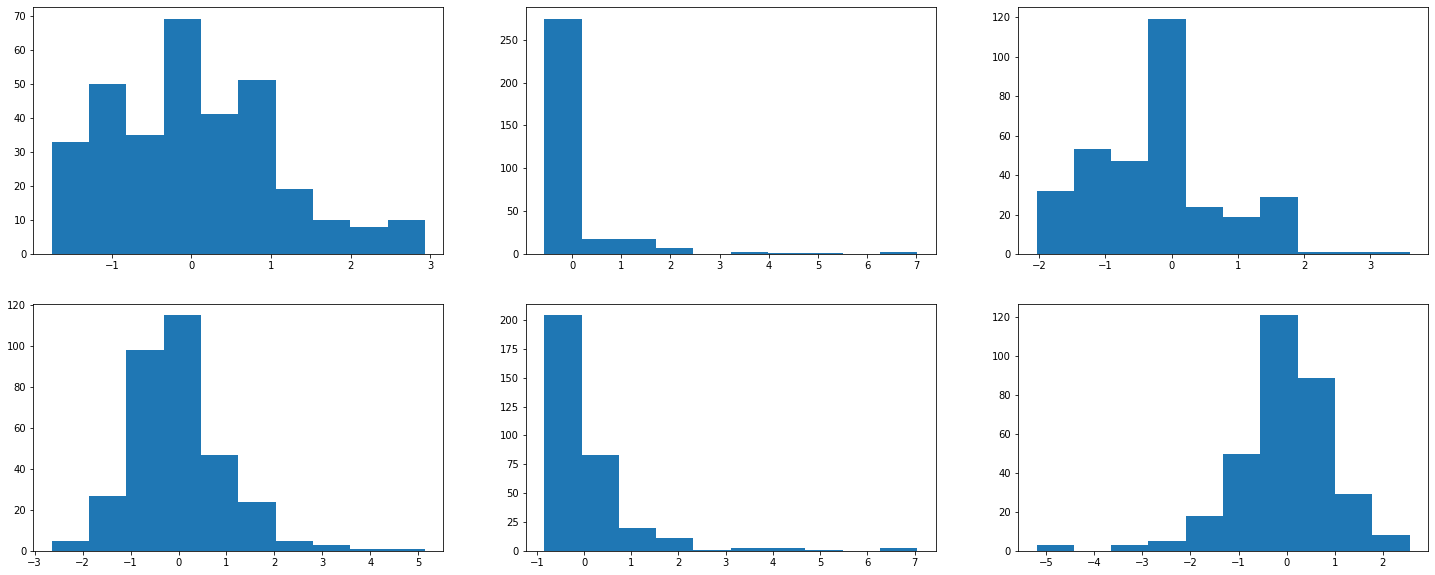

In [109]:
plt.figure(figsize=(25, 10))
for idx in range(1,7):
    plt.subplot(2,3,idx)
    plt.hist(feat_train[:,idx-1])

## ACA TENEMOS EL DATASET RECORTADO Y STANDARIZADO 

In [41]:
score_metric = "recall" # Queremos pocos FN, es decir pacientes q decimos q NO tienen riesgo pero SI.

---

## ALGUNAS FUNCIONES UTILES PARA GRAFICAR

In [12]:
def aoc_curves (model,feat,targ):
    predicted_p = cross_val_predict(model,feat,targ,cv=10,method="predict_proba")
    fpr, tpr, thres = roc_curve(targ, predicted_p[:,1])
    precisions, recalls, thres = precision_recall_curve(targ, predicted_p[:,1])
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recalls, precisions)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,label = "ROC AOC:{:.3f}".format(roc_auc))
    plt.plot([0,1],[0,1],'--k', alpha=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(recalls,precisions,label = "PR AOC:{:.3f}".format(pr_auc))
    plt.plot([1,0],[0,1],'--k', alpha=0.5)
    plt.ylabel('Precisión')
    plt.xlabel('Recall')
    plt.title('Curva PR')
    plt.legend()

In [110]:
def train_test_curve (model,param,param_range): 
    train__scores, test__scores = validation_curve(model,feat_train,targ_train,param_name=param,param_range=param_range,scoring=score_metric,cv=20)

    train__mean = np.mean(train__scores,axis=1)
    #train__std = np.std(train__scores,axis=1)
    test__mean = np.mean(test__scores,axis=1)
    #test__std = np.std(test__scores,axis=1)
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,2)
    plt.plot(param_range,train__mean,color='blue',marker='o',markersize=5,label='training recall')
    plt.xscale("log")
    plt.plot(param_range,test__mean,color='green',marker='x',markersize=5,label='validation recall') 
    plt.xlabel(param)
    plt.ylabel(score_metric)
    plt.legend(loc='upper left')

In [10]:
def plt_eb (model,rmax):
    means,errors = [],[]
    
    for j in range(2,rmax):
        scorings = cross_val_score(model, feat_train, targ_train,cv=j, scoring=score_metric)
        means.append(scorings.mean())
        errors.append(scorings.std())

    plt.figure(figsize=(15,8))
    plt.xlabel("Cantidad de Folds en CV")
    plt.ylabel("Recall Score")
    plt.title("Mean: {:.3f}+/-{:.3f}".format(np.mean(means),np.mean(errors)))
    plt.ylim((0,1.1))
    plt.errorbar(x=range(2,rmax),y=means,yerr=errors,fmt="-o")

In [42]:
def model_setup (model):
    model.fit(feat_train,targ_train)

    scoring = cross_val_score(model, feat_train, targ_train,cv=10, scoring=score_metric)
    print("Cross Validation Score: {:.3f} +/- {:.3f}".format(scoring.mean(),scoring.std()))

    predicted = cross_val_predict(model,feat_train,targ_train,cv=10)
    print(classification_report(targ_train, predicted))
    
    cm = confusion_matrix(targ_train, predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

---
---
---

# BASELINE

Cross Validation Score: 0.542 +/- 0.242
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       163
           1       0.64      0.54      0.58       163

    accuracy                           0.62       326
   macro avg       0.62      0.62      0.61       326
weighted avg       0.62      0.62      0.61       326



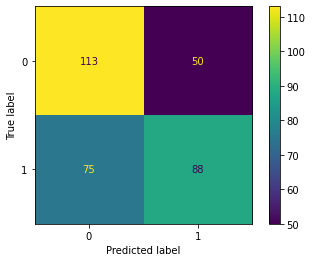

In [43]:
percep1 = Perceptron(fit_intercept=True, max_iter=40000)
model_setup(percep1)

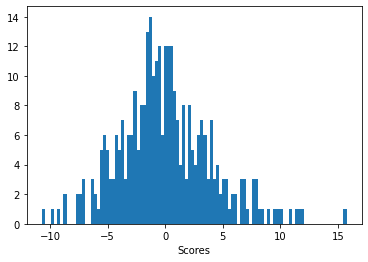

In [59]:
y_scores = cross_val_predict(percep1, feat_train, targ_train, cv=10, method="decision_function")

A = plt.hist(y_scores,100)
plt.xlabel('Scores')
plt.show()

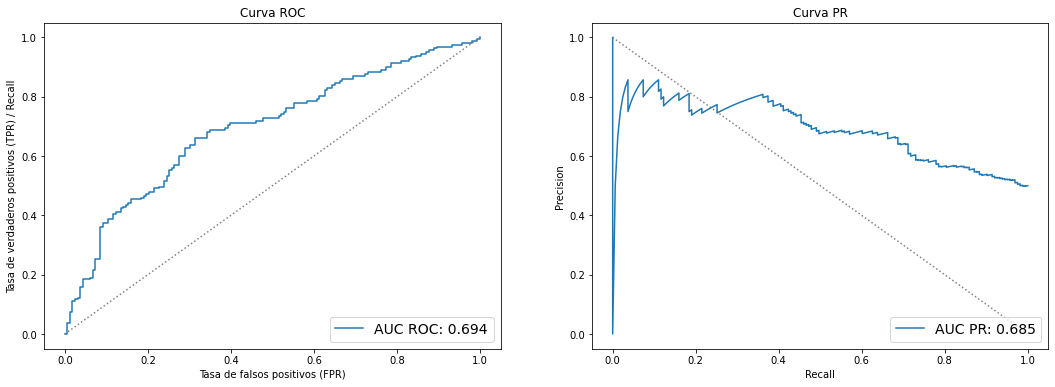

In [63]:
precisions, recalls, thresholds = precision_recall_curve(targ_train, y_scores)
fpr, tpr, thresholds = roc_curve(targ_train, y_scores)

auc_score_PR = auc(recalls, precisions)
auc_score_ROC = auc(fpr,tpr)

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(122)
ax.plot(recalls,precisions, label = "AUC PR: {:.3f}".format(auc_score_PR))
ax.plot([0, 1], [1, 0], color='0.5', ls=':')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Curva PR')
ax.legend(loc='lower right', fontsize=14)

ax2 = fig.add_subplot(121)
ax2.plot(fpr, tpr,label = "AUC ROC: {:.3f}".format(auc_score_ROC))
ax2.plot([0, 1], [0, 1], color='0.5', ls=':')
ax2.set_xlabel('Tasa de falsos positivos (FPR)')
ax2.set_ylabel('Tasa de verdaderos positivos (TPR) / Recall')
ax2.set_title('Curva ROC')
ax2.legend(loc='lower right', fontsize=14)

Cross Validation Score: 0.773 +/- 0.110
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       163
           1       0.66      0.77      0.71       163

    accuracy                           0.68       326
   macro avg       0.69      0.68      0.68       326
weighted avg       0.69      0.68      0.68       326



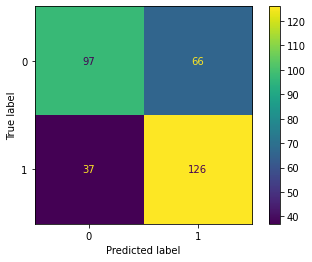

In [44]:
percep2 = Perceptron(max_iter=40000,penalty="l2",random_state=420,alpha=0.0012689610031679235,eta0=0.041753189365604)
model_setup(percep2)

In [33]:
hyperparam = {"eta0":np.logspace(-2,1,30),"alpha":np.logspace(-7,0,30)}
per_model = Perceptron(fit_intercept=True, max_iter=40000,penalty="l2",random_state=420,alpha=5e-5,eta0=0.05)
per_grilla = GridSearchCV(per_model,hyperparam,cv=10,scoring=score_metric,n_jobs=-1)
per_grilla.fit(feat_train,targ_train)
print(per_grilla.best_params_)
svm_model = per_grilla.best_estimator_

{'alpha': 0.0012689610031679235, 'eta0': 0.041753189365604}


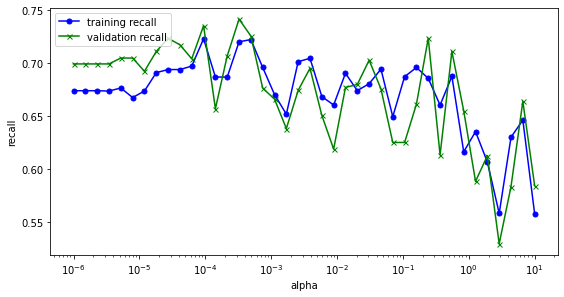

In [112]:
train_test_curve(percep2,"alpha",np.logspace(-6,1,40))

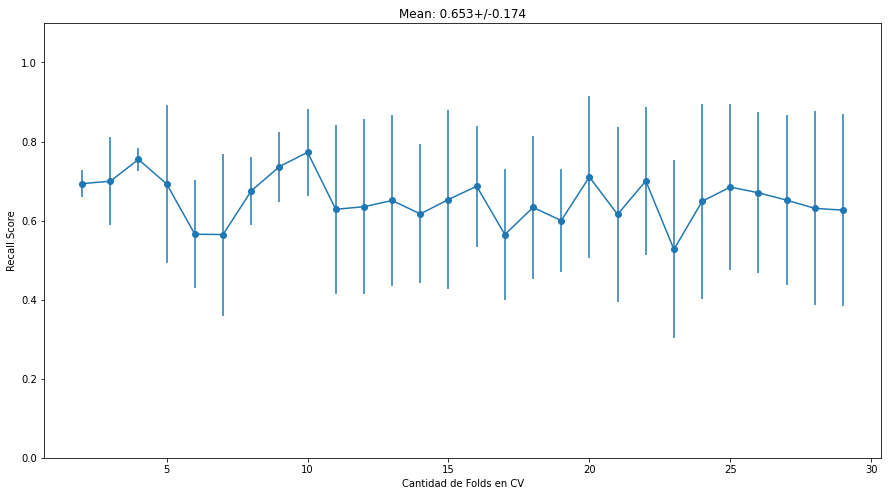

In [39]:
plt_eb(percep2,30)

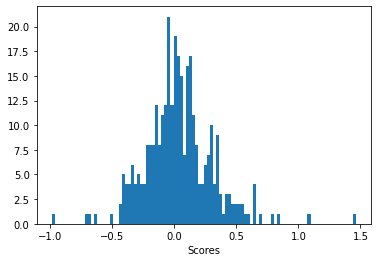

In [65]:
y_scores = cross_val_predict(percep2, feat_train, targ_train, cv=10, method="decision_function")

A = plt.hist(y_scores,100)
plt.xlabel('Scores')
plt.show()

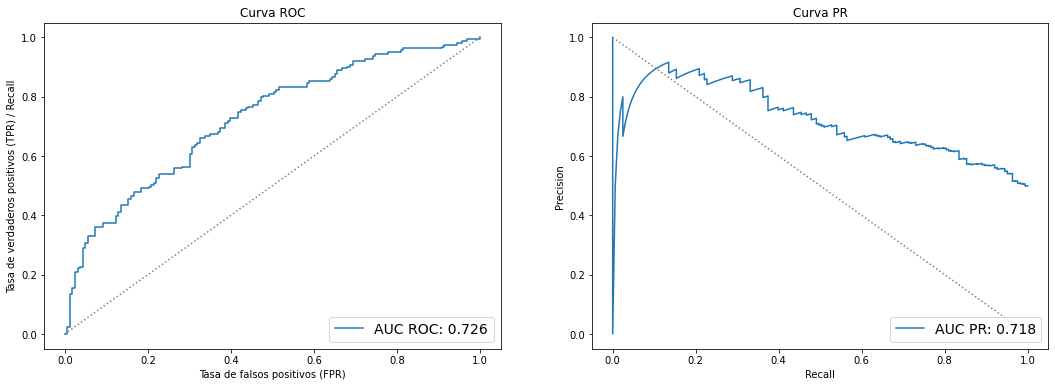

In [66]:
precisions, recalls, thresholds = precision_recall_curve(targ_train, y_scores)
fpr, tpr, thresholds = roc_curve(targ_train, y_scores)

auc_score_PR = auc(recalls, precisions)
auc_score_ROC = auc(fpr,tpr)

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(122)
ax.plot(recalls,precisions, label = "AUC PR: {:.3f}".format(auc_score_PR))
ax.plot([0, 1], [1, 0], color='0.5', ls=':')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Curva PR')
ax.legend(loc='lower right', fontsize=14)

ax2 = fig.add_subplot(121)
ax2.plot(fpr, tpr,label = "AUC ROC: {:.3f}".format(auc_score_ROC))
ax2.plot([0, 1], [0, 1], color='0.5', ls=':')
ax2.set_xlabel('Tasa de falsos positivos (FPR)')
ax2.set_ylabel('Tasa de verdaderos positivos (TPR) / Recall')
ax2.set_title('Curva ROC')
ax2.legend(loc='lower right', fontsize=14)

# LOGISTIC REGRESSION

Cross Validation Score: 0.731 +/- 0.107
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       163
           1       0.74      0.73      0.74       163

    accuracy                           0.74       326
   macro avg       0.74      0.74      0.74       326
weighted avg       0.74      0.74      0.74       326



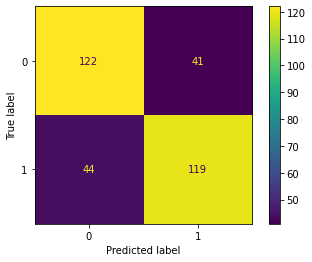

In [45]:
lr_model = LogisticRegression(dual=False, max_iter=40000,C=2.9470517025518097)
model_setup(lr_model)

In [45]:
hyperparam = {"C":np.logspace(-1,3,50)}
lr_model = LogisticRegression(dual=False, max_iter=40000,C=2)
lr_grilla = GridSearchCV(lr_model,hyperparam,cv=10,scoring=score_metric,n_jobs=-1)
lr_grilla.fit(feat_train,targ_train)
print(lr_grilla.best_params_)
lr_model = lr_grilla.best_estimator_

{'C': 2.9470517025518097}


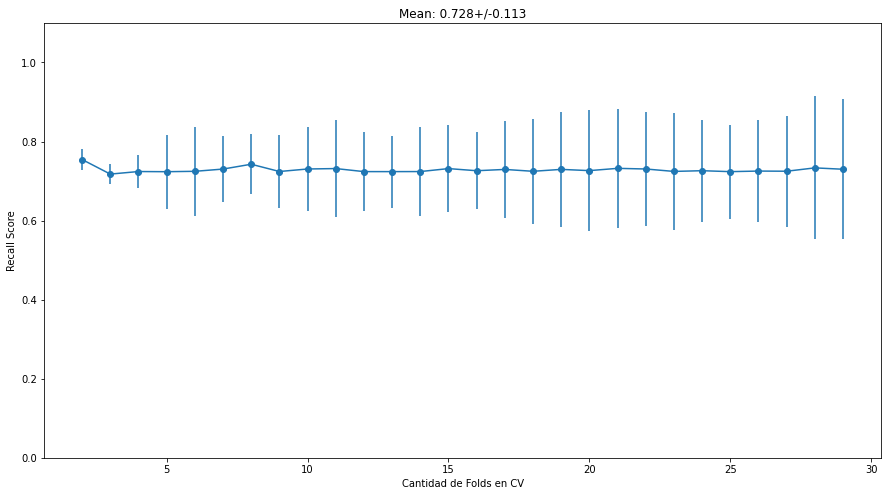

In [47]:
plt_eb(lr_model,30)

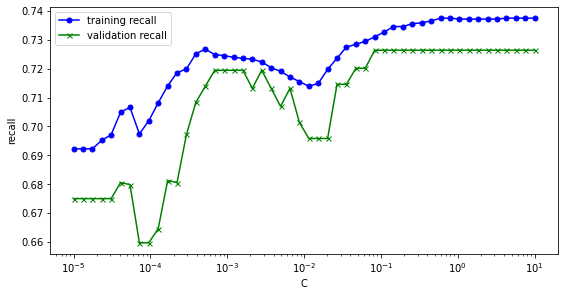

In [114]:
train_test_curve(lr_model,"C",np.logspace(-5,1,50))

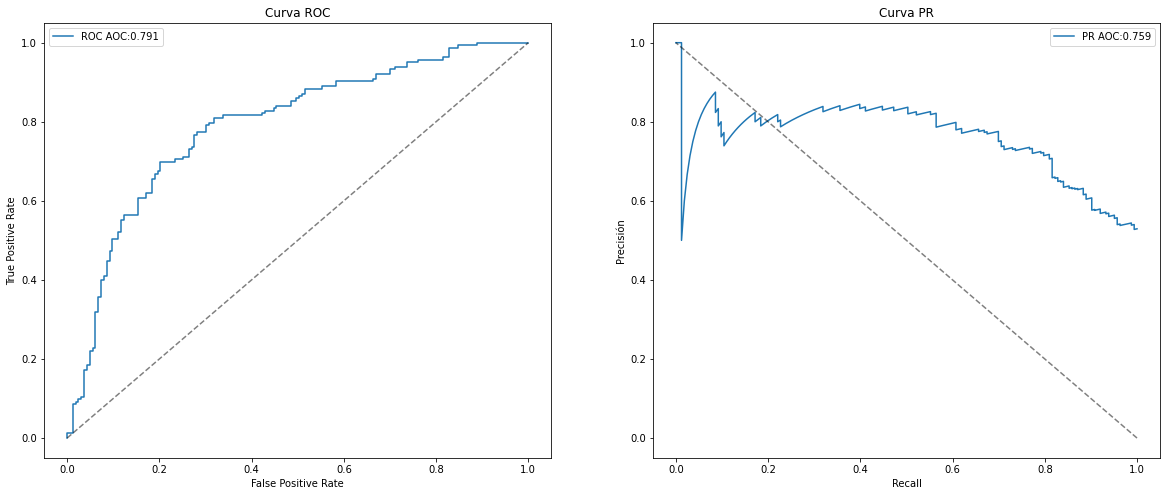

In [24]:
aoc_curves(lr_model,feat_train,targ_train)

---

# SVM

## BEST PARAMS => C = 0.85, Gamma = 0.61 -> Recall = 0.872+/-0.075

Cross Validation Score: 0.895 +/- 0.063
              precision    recall  f1-score   support

           0       0.86      0.64      0.74       163
           1       0.72      0.90      0.80       163

    accuracy                           0.77       326
   macro avg       0.79      0.77      0.77       326
weighted avg       0.79      0.77      0.77       326



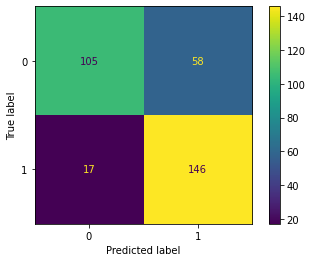

In [46]:
svm_model = SVC(probability=True,gamma=1.1721022975334805,C=0.1487352107293511)
model_setup(svm_model)

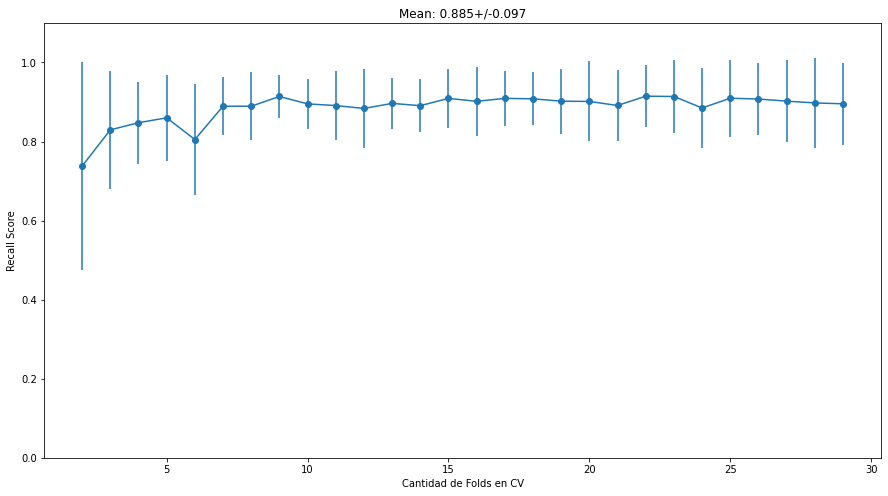

In [52]:
plt_eb(svm_model,30)

In [50]:
hyperparam = {"C":np.logspace(-2,0,30),"gamma":np.logspace(-2,2,30)}
svm_model = SVC(break_ties=True,probability=True)
svm_grilla = GridSearchCV(svm_model,hyperparam,cv=10,scoring=score_metric,n_jobs=-1)
svm_grilla.fit(feat_train,targ_train)
print(svm_grilla.best_params_)
svm_model = svm_grilla.best_estimator_

{'C': 0.1487352107293511, 'gamma': 1.1721022975334805}


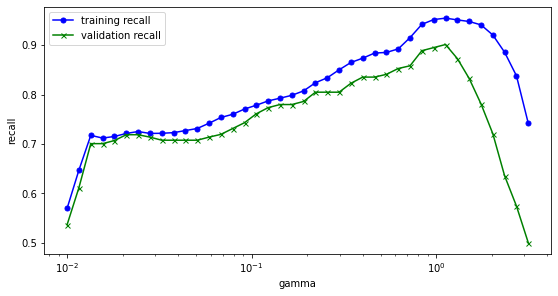

In [115]:
train_test_curve(svm_model,"gamma",np.logspace(-2,0.5,40))

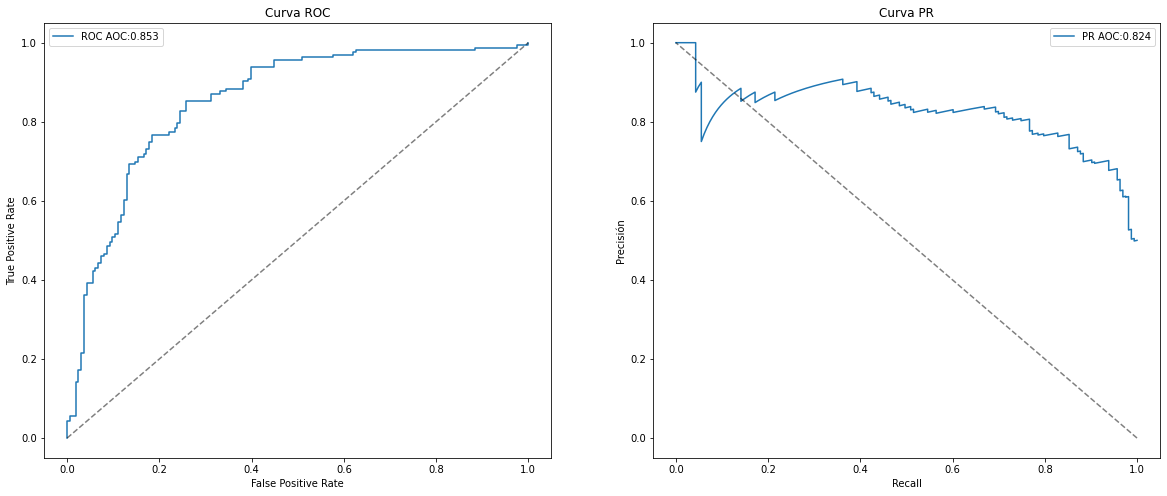

In [53]:
aoc_curves(svm_model,feat_train,targ_train)

---

# Random Forest

Cross Validation Score: 0.861 +/- 0.114
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       163
           1       0.81      0.83      0.82       163

    accuracy                           0.82       326
   macro avg       0.82      0.82      0.82       326
weighted avg       0.82      0.82      0.82       326



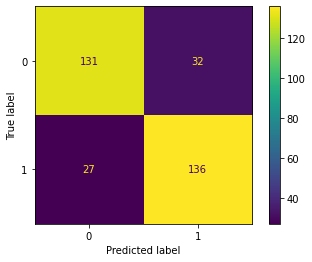

In [47]:
rf_model = RandomForestClassifier(n_estimators=50)
model_setup(rf_model)

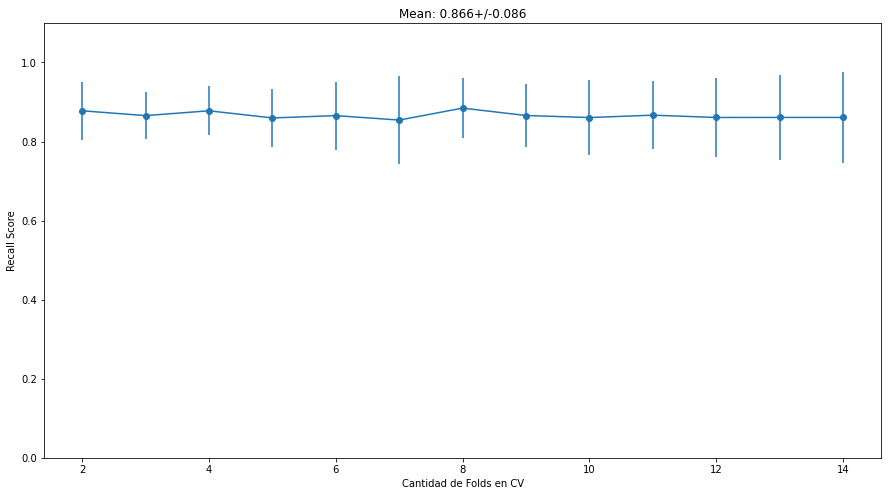

In [77]:
plt_eb(rf_model,15)

In [75]:
hyperparam = {"n_estimators":[20,50,100,200,400],"max_depth":[5,6,7,8,9,None],"min_samples_split":[2,20,30,40]}
rf_model = RandomForestClassifier(min_impurity_decrease=2e-4)
rf_grilla = GridSearchCV(rf_model,hyperparam,cv=10,scoring=score_metric,n_jobs=-1)
rf_grilla.fit(feat_train,targ_train)
rf_model = rf_grilla.best_estimator_
print(rf_grilla.best_params_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


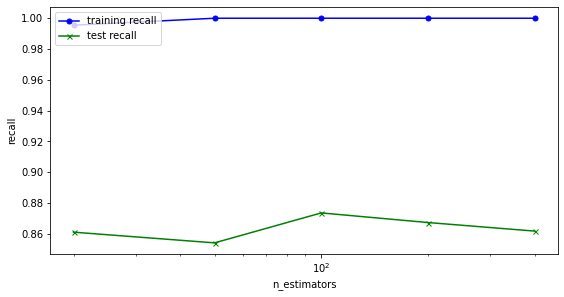

In [66]:
train_test_curve(rf_model,"n_estimators",[20,50,100,200,400])

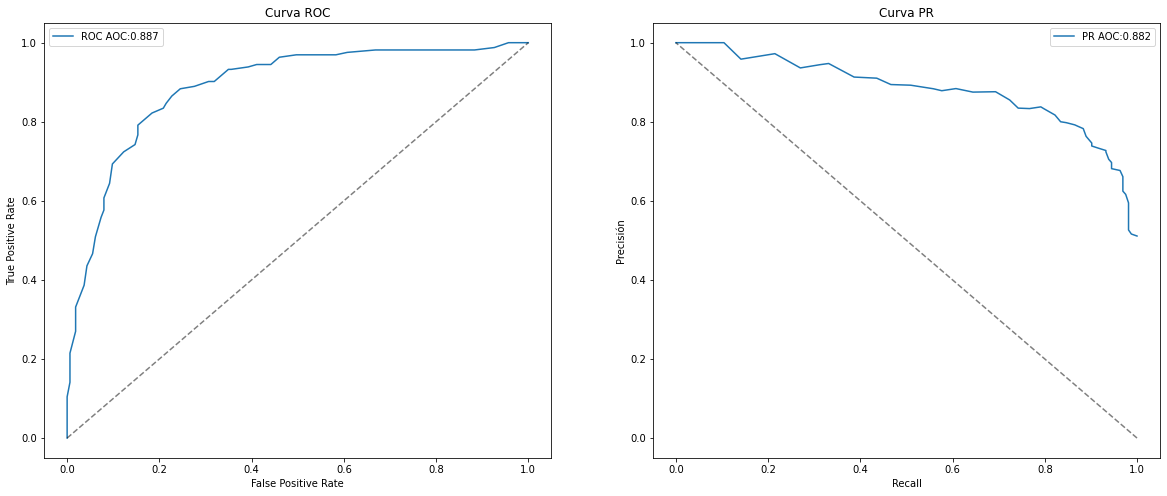

In [78]:
aoc_curves(rf_model,feat_train,targ_train)

---

# ADA BOOSTING

Cross Validation Score: 0.805 +/- 0.082
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       163
           1       0.74      0.81      0.77       163

    accuracy                           0.76       326
   macro avg       0.76      0.76      0.76       326
weighted avg       0.76      0.76      0.76       326



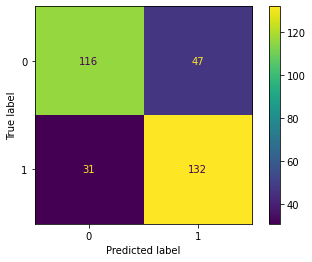

In [48]:
ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),learning_rate=2e-2)
model_setup(ada_model)

(array([163.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 163.]),
 array([2.22044605e-16, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

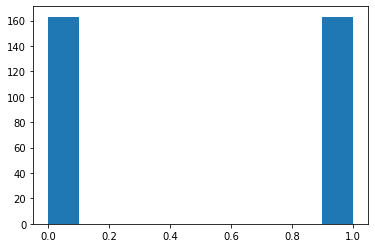

In [133]:
plt.hist(ada_model.predict_proba(feat_train)[:,1])

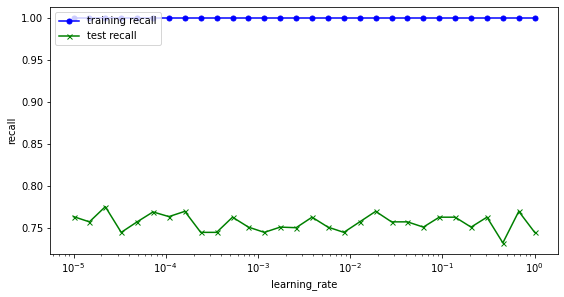

In [119]:
train_test_curve(ada_model,"learning_rate",np.logspace(-5,-0,30))

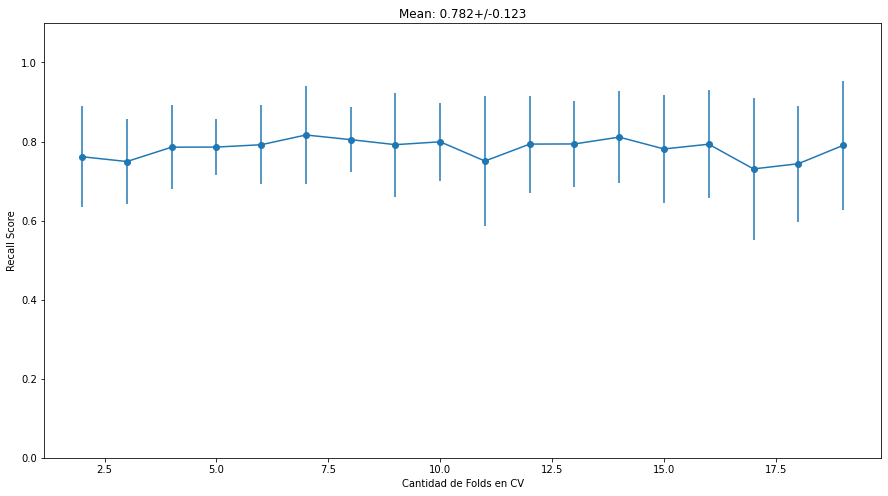

In [123]:
plt_eb(ada_model,20)

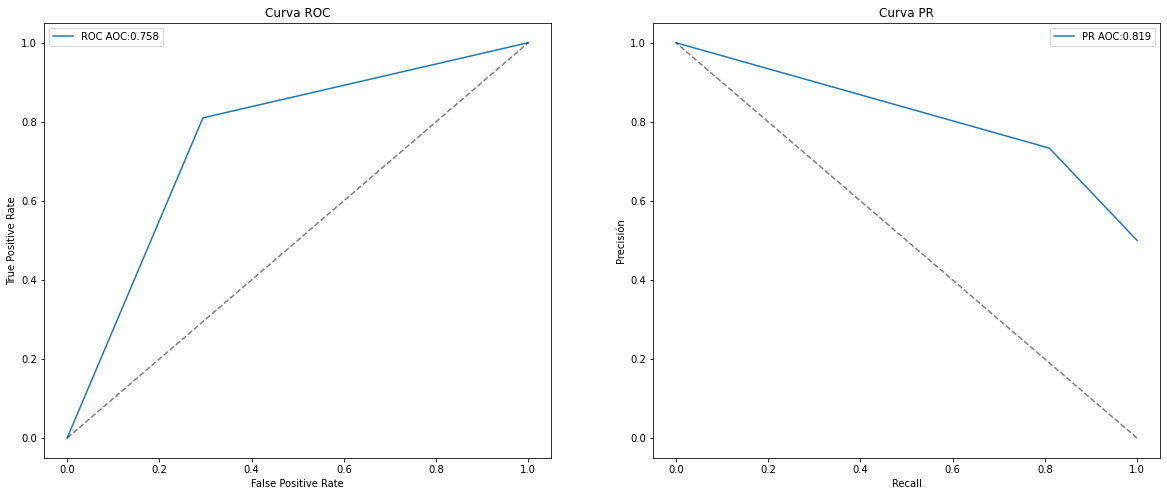

In [134]:
aoc_curves(ada_model,feat_train,targ_train)


---


# GRADIENT BOOSTING

## BEST PARAMS => n_estimators = 500, learning_rate = 0.05,objective="binary:hinge" -> Recall = 0.843+/-0.158

### Cambia levemente la metodologia, usa early stopping

In [49]:
feat_train_2, feat_val, targ_train_2, targ_val = train_test_split(feat_train,targ_train,random_state=420)
# NECESARIO CREAR DATOS DE VALIDACION PARA USAR XGBC

In [50]:
xgbc_model = XGBClassifier(use_label_encoder=False,objective='binary:hinge',learning_rate=0.05,n_estimators=500)
xgbc_model.fit(feat_train_2,targ_train_2,eval_set=[(feat_train_2, targ_train_2), (feat_val, targ_val)],eval_metric="error",early_stopping_rounds=20,verbose=True)
xgbc_scoring = cross_val_score(xgbc_model, feat_train, targ_train,cv=10, scoring=score_metric)
print("Cross Validation Score: {:.3f} +/- {:.3f}".format(xgbc_scoring.mean(),xgbc_scoring.std())) 

[0]	validation_0-error:0.52459	validation_1-error:0.42683
[1]	validation_0-error:0.52459	validation_1-error:0.42683
[2]	validation_0-error:0.52459	validation_1-error:0.42683
[3]	validation_0-error:0.52459	validation_1-error:0.42683
[4]	validation_0-error:0.52459	validation_1-error:0.42683
[5]	validation_0-error:0.52459	validation_1-error:0.42683
[6]	validation_0-error:0.52459	validation_1-error:0.42683
[7]	validation_0-error:0.52459	validation_1-error:0.42683
[8]	validation_0-error:0.52459	validation_1-error:0.42683
[9]	validation_0-error:0.52459	validation_1-error:0.42683
[10]	validation_0-error:0.52459	validation_1-error:0.42683
[11]	validation_0-error:0.18443	validation_1-error:0.29268
[12]	validation_0-error:0.15574	validation_1-error:0.29268
[13]	validation_0-error:0.11885	validation_1-error:0.26829
[14]	validation_0-error:0.10656	validation_1-error:0.28049
[15]	validation_0-error:0.10656	validation_1-error:0.26829
[16]	validation_0-error:0.10246	validation_1-error:0.26829
[17]	va

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       163
           1       0.79      0.81      0.80       163

    accuracy                           0.80       326
   macro avg       0.80      0.80      0.80       326
weighted avg       0.80      0.80      0.80       326



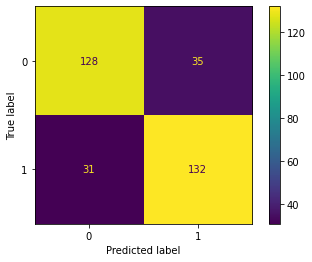

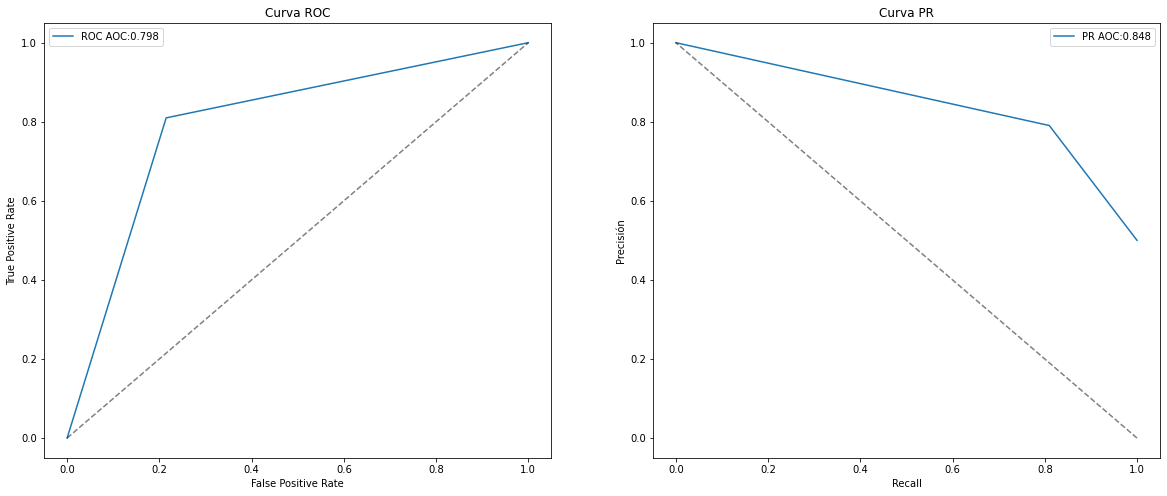

In [137]:
xgbc_predicted = cross_val_predict(xgbc_model,feat_train,targ_train,cv=10)
print(classification_report(targ_train, xgbc_predicted))
cm = confusion_matrix(targ_train, xgbc_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
aoc_curves(xgbc_model,feat_train,targ_train)

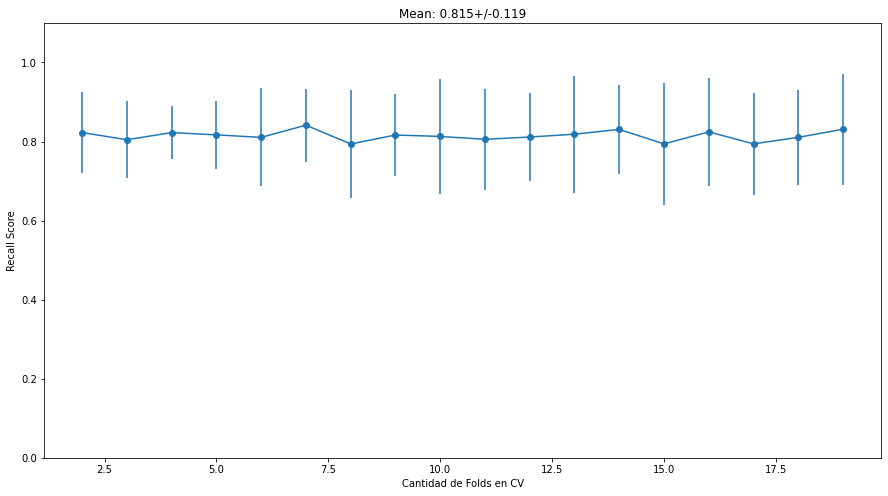

In [41]:
plt_eb(xgbc_model,20)

---

# VOTING

In [51]:
vot_hard_model = VotingClassifier(
    estimators=[('lr', lr_model), ('tree', rf_model), ('svc', svm_model)],
    voting='hard')
vot_soft_model = VotingClassifier(
    estimators=[('lr', lr_model), ('tree', rf_model), ('svc', svm_model)],
    voting='soft')

## HARD

Cross Validation Score: 0.860 +/- 0.087
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       163
           1       0.78      0.87      0.83       163

    accuracy                           0.82       326
   macro avg       0.82      0.82      0.82       326
weighted avg       0.82      0.82      0.82       326



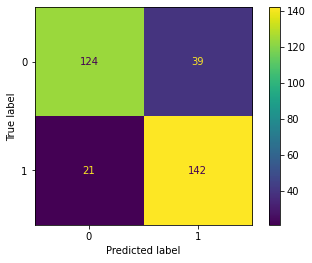

In [52]:
model_setup(vot_hard_model)

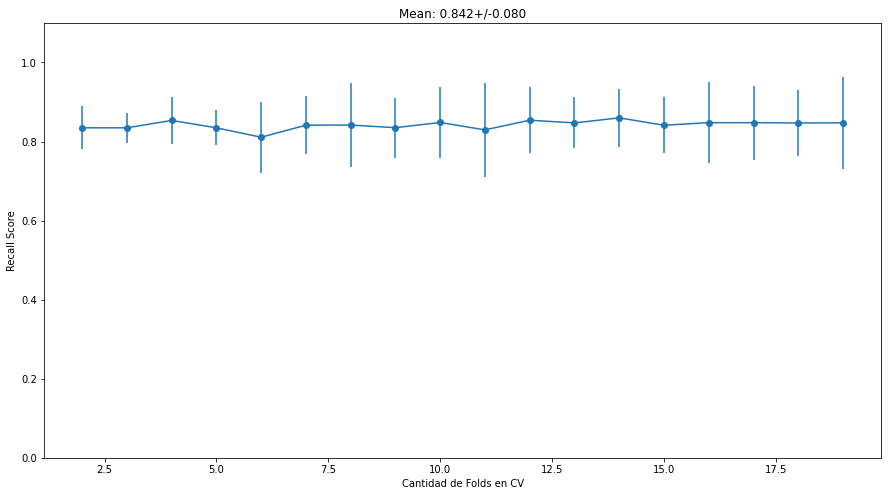

In [44]:
plt_eb(vot_hard_model,20)

## SOFT

Cross Validation Score: 0.842 +/- 0.080
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       163
           1       0.79      0.84      0.81       163

    accuracy                           0.81       326
   macro avg       0.81      0.81      0.81       326
weighted avg       0.81      0.81      0.81       326



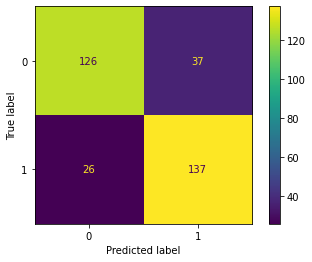

In [53]:
model_setup(vot_soft_model)

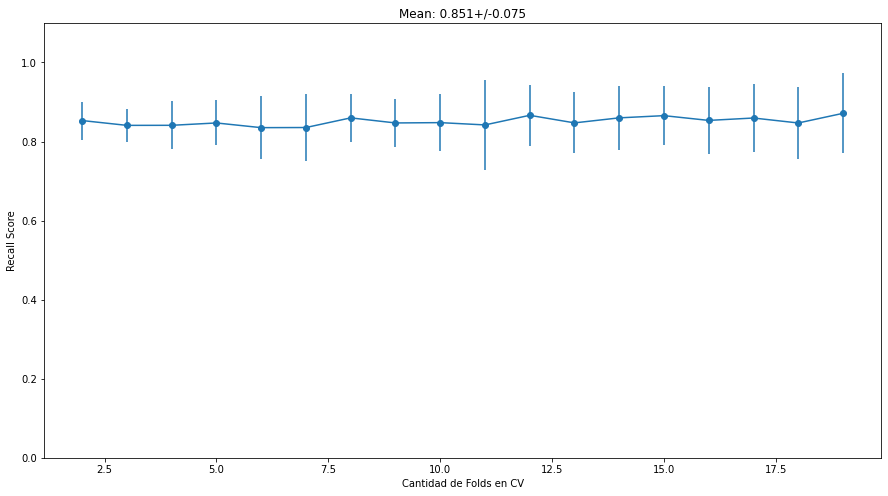

In [91]:
plt_eb(vot_soft_model,20)

---

# RED NEURONAL SIMPLE

In [7]:
keras.backend.clear_session()

In [8]:
input = keras.layers.Input(shape=[6,])
flatten = keras.layers.Flatten()(input)
hidden1 = keras.layers.Dense(100, activation="relu",kernel_initializer='he_uniform')(flatten)
dropout = keras.layers.Dropout(rate=0.2)(hidden1)
hidden2 = keras.layers.Dense(100, activation="relu",kernel_initializer='he_uniform')(hidden1)
output = keras.layers.Dense(1, activation="sigmoid")(hidden2)

model = keras.models.Model(inputs=[input], outputs=[output])

In [9]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[tf.keras.metrics.Recall()])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
flatten (Flatten)            (None, 6)                 0         
_________________________________________________________________
dense (Dense)                (None, 100)               700       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 10,901
Trainable params: 10,901
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(feat_train, targ_train, epochs=2000, batch_size=32,
                    validation_split=0.2,
                    callbacks=[keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)])

Epoch 1/2000
9/9 [==============================] - 0s 19ms/step - loss: 0.7013 - recall: 0.1546 - val_loss: 0.8049 - val_recall: 0.3788
Epoch 2/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5552 - recall: 0.4639 - val_loss: 0.7316 - val_recall: 0.6364
Epoch 3/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5252 - recall: 0.7216 - val_loss: 0.6392 - val_recall: 0.6667
Epoch 4/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.5118 - recall: 0.6701 - val_loss: 0.7447 - val_recall: 0.6515
Epoch 5/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.4980 - recall: 0.7423 - val_loss: 0.6119 - val_recall: 0.6667
Epoch 6/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.4823 - recall: 0.6907 - val_loss: 0.7496 - val_recall: 0.6212
Epoch 7/2000
9/9 [==============================] - 0s 3ms/step - loss: 0.4803 - recall: 0.5979 - val_loss: 0.7774 - val_recall: 0.6212
Epoch 8/2000
9/9 [=============================

In [22]:
model.evaluate(feat_train,targ_train)

11/11 [==============================] - 0s 500us/step - loss: 0.0561 - recall: 0.9693


[0.05606089532375336, 0.9693251252174377]

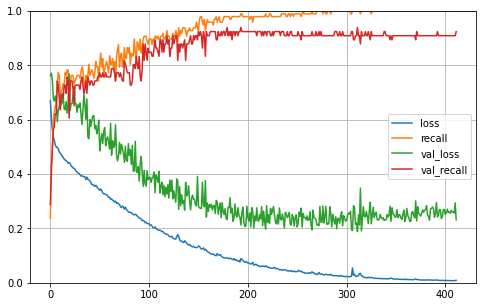

In [51]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
def aoc_curves (model,feat,targ):
    predicted_p = cross_val_predict(model,feat,targ,cv=10,method="predict_proba")
    fpr, tpr, thres = roc_curve(targ, predicted_p[:,1])
    precisions, recalls, thres = precision_recall_curve(targ, predicted_p[:,1])
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recalls, precisions)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,label = "ROC AOC:{:.3f}".format(roc_auc))
    plt.plot([0,1],[0,1],'--k', alpha=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(recalls,precisions,label = "PR AOC:{:.3f}".format(pr_auc))
    plt.plot([1,0],[0,1],'--k', alpha=0.5)
    plt.ylabel('Precisión')
    plt.xlabel('Recall')
    plt.title('Curva PR')
    plt.legend()

In [85]:
mask = model.predict(feat_test)>0.5
mask = 1*mask
recall_score(mask,targ_test)


In [87]:
mask = 1*mask

In [89]:
recall_score(mask,targ_test)

0.6470588235294118

In [88]:
mask

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

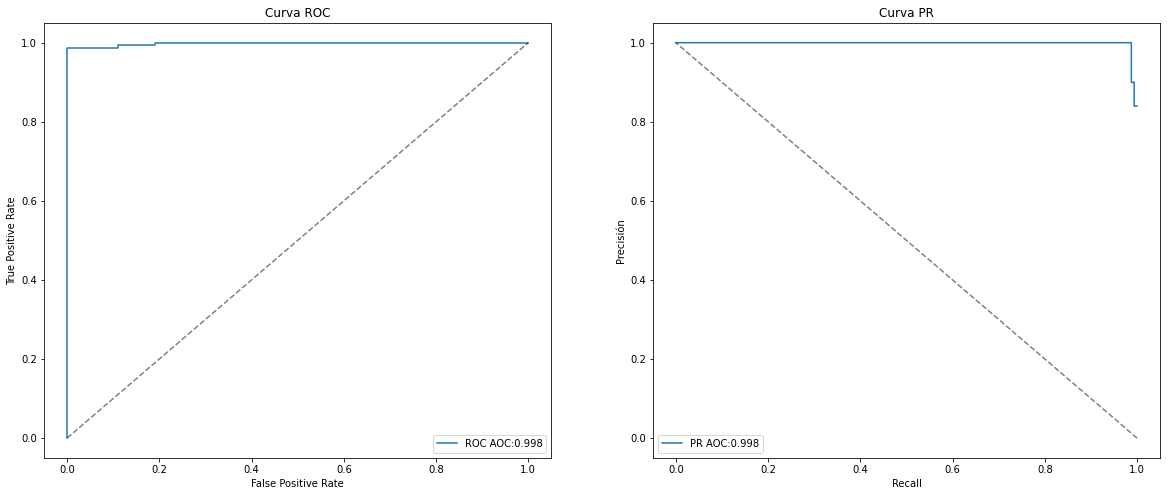

In [19]:
predicted_p = model.predict(feat_train)
precisions, recalls, thres = precision_recall_curve(targ_train, predicted_p)
fpr, tpr, thres = roc_curve(targ_train, predicted_p)
roc_auc = auc(fpr, tpr)
pr_auc = auc(recalls, precisions)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(1,2,1)
plt.plot(fpr,tpr,label = "ROC AOC:{:.3f}".format(roc_auc))
plt.plot([0,1],[0,1],'--k', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.subplot(1,2,2)
plt.plot(recalls,precisions,label = "PR AOC:{:.3f}".format(pr_auc))
plt.plot([1,0],[0,1],'--k', alpha=0.5)
plt.ylabel('Precisión')
plt.xlabel('Recall')
plt.title('Curva PR')
plt.legend()

(array([163.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 163.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

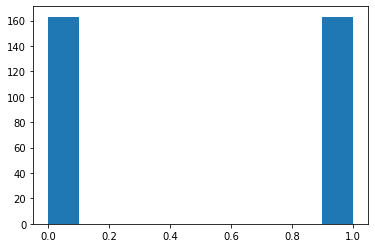

In [53]:
plt.hist(targ_train)

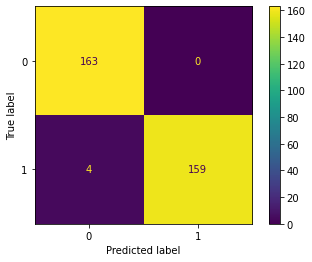

In [54]:
cm = confusion_matrix(targ_train, model.predict(feat_train)>0.5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

---


# SCORES PARA TEST

In [72]:
test_orig = pd.read_csv(r"DS_G3_HeartFailure_FULL_test.csv",index_col=0)
test_cleaned = test_orig.drop(["time","anaemia","diabetes","high_blood_pressure","sex","smoking"],axis=1)
feat_test, targ_test = test_cleaned.drop(["DEATH_EVENT"],axis=1),test_cleaned["DEATH_EVENT"]
feat_test = scaler.transform(feat_test)

In [59]:
names = ["Per (BL)","Per_op","LR_op","SVC_op","RF_op","ADA_op","XGBC_op","VotHard","VotSoft"]

In [60]:
modelos = [percep1,percep2,lr_model,svm_model,rf_model,ada_model,xgbc_model,vot_hard_model,vot_soft_model]

In [61]:
for idx,mode in enumerate(modelos):
    print("{}:{:.3f}".format(names[idx],recall_score(mode.predict(feat_test),targ_test)))

Per (BL):0.538
Per_op:0.400
LR_op:0.667
SVC_op:0.586
RF_op:0.667
ADA_op:0.526
XGBC_op:0.579
VotHard:0.652
VotSoft:0.619


2/2 [==============================] - 0s 999us/step - loss: 0.0000e+00 - recall: 0.0000e+00


[0.0, 0.0]